# NOTEBOOK_ML📕
Prévision crédit Immobilier 

In [8]:
import mysql.connector

In [9]:
# Importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from transformers import pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix , classification_report
from scikitplot.estimators import plot_learning_curve
import scikitplot as skplt
from yellowbrick.model_selection import LearningCurve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion
import pickle

In [10]:
df_clean=pd.read_csv('train.csv')

In [11]:
df_clean

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
df_clean.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df_clean = df_clean.drop(['Loan_ID'], axis=1)

In [14]:
# df_credit.Loan_Status.head(10)

In [15]:
df_clean

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
df_clean.Loan_Status=df_clean.Loan_Status.map({'Y':1,'N':0})

In [17]:
df_clean[:-2]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
607,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,1
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,1
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1


In [18]:
X = df_clean.drop("Loan_Status", axis=1)

In [19]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [20]:
y = df_clean["Loan_Status"]

In [21]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 42, test_size = 0.2)

In [23]:
# y_train = LabelEncoder()
# categ = ['Loan_Status']
# df_clean[categ] = df_clean[categ].apply(lBE.fit_transform)
# df_clean

In [24]:
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_ohe=pd.DataFrame(ohe.fit_transform(X_train[["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]]).toarray())
X_train_ohe.columns = ohe.get_feature_names(["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"])

X_test_ohe=pd.DataFrame(ohe.transform(X_test[["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]]).toarray())
X_test_ohe.columns = ohe.get_feature_names(["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"])

C:\Users\simplon\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\simplon\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# FEATURE SCALING

# Preprocessing

In [25]:
preprocessing_MinMaxScaler = Pipeline(steps=[
    ("MinMaxscaler", MinMaxScaler())])

In [26]:
sm = SMOTE(sampling_strategy='auto')

# 1) Iteration_DummyClassifier

In [27]:
LogicReg = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', LogisticRegression()]])

In [28]:
pipeline_DC = imbpipeline(steps = [['SMOTE', sm],
                                    ['classifier', DummyClassifier(strategy="uniform")]
                                    ])

In [29]:
pipeline_DC = imbpipeline(steps = [['SMOTE', sm],
                                    ['classifier', DummyClassifier(strategy="uniform")]
                                    ])

In [30]:
pipeline_DC.fit(X_train_ohe, y_train)

Pipeline(steps=[('SMOTE', SMOTE()),
                ['classifier', DummyClassifier(strategy='uniform')]])

In [31]:
pipeline_DC = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', DummyClassifier(strategy="uniform")]
                                    ])

In [32]:
pipeline_DC.fit(X_train_ohe, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', DummyClassifier(strategy='uniform')]])

In [33]:
print("accuracy train : %.3f"%pipeline_DC.score(X_train_ohe , y_train))
print("accuracy test : %.3f"%pipeline_DC.score(X_test_ohe , y_test))

accuracy train : 0.487
accuracy test : 0.398


In [34]:
y_pred_pipeline_DC = pipeline_DC.predict(X_test_ohe) 

In [35]:
print(classification_report(y_test, y_pred_pipeline_DC))

              precision    recall  f1-score   support

           0       0.35      0.58      0.43        43
           1       0.65      0.41      0.50        80

    accuracy                           0.47       123
   macro avg       0.50      0.50      0.47       123
weighted avg       0.54      0.47      0.48       123



# Matrice confusion

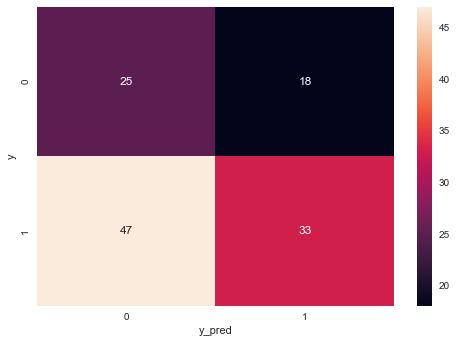

In [36]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_pipeline_DC)

# Learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

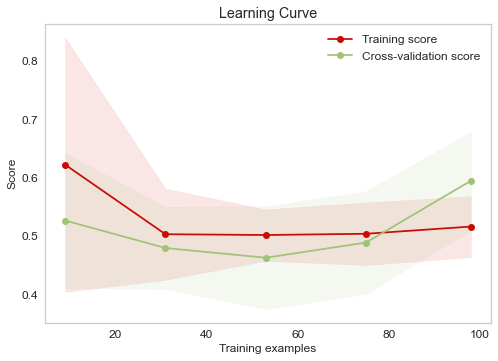

In [37]:
plot_learning_curve(pipeline_DC, X_test_ohe , y_test)

# ROC-AUC

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

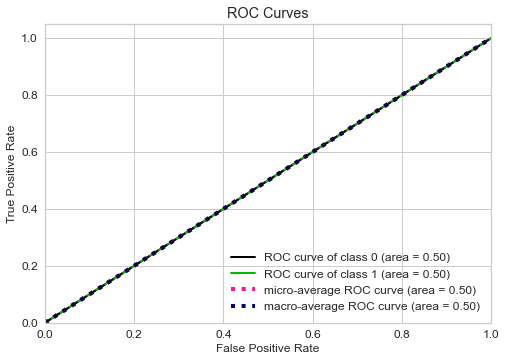

In [39]:
pipeline_DC.fit(X_train_ohe, y_train)
y_probas = pipeline_DC.predict_proba(X_test_ohe)
skplt.metrics.plot_roc(y_test, y_probas)

# 2) Iteration LogisiticRegression

In [40]:
LogicReg = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', LogisticRegression()]])

In [41]:
LogicReg.fit(X_train_ohe, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', LogisticRegression()]])

In [42]:
print("accuracy train : %.3f"%LogicReg.score(X_train_ohe, y_train))
print("accuracy test : %.3f"%LogicReg.score(X_test_ohe , y_test))   

accuracy train : 0.701
accuracy test : 0.634


In [43]:
y_pred_LogicReg = LogicReg.predict(X_test_ohe) 

In [44]:
print(classification_report(y_test, y_pred_LogicReg))

              precision    recall  f1-score   support

           0       0.25      0.02      0.04        43
           1       0.65      0.96      0.77        80

    accuracy                           0.63       123
   macro avg       0.45      0.49      0.41       123
weighted avg       0.51      0.63      0.52       123



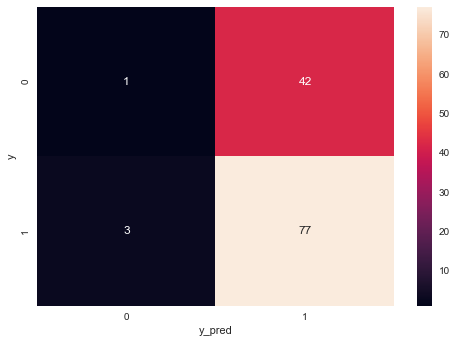

In [45]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_LogicReg)

# Learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

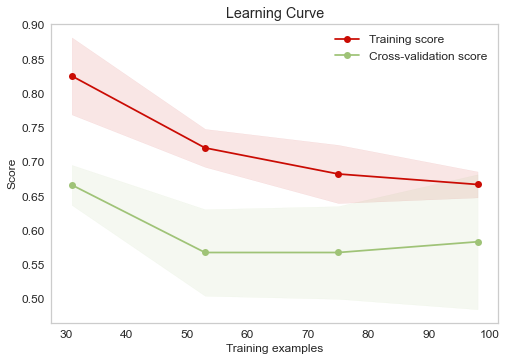

In [46]:
plot_learning_curve(LogicReg,X_test_ohe , y_test)

# ROC-AUC

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

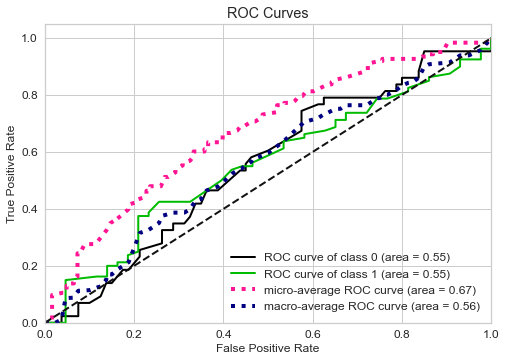

In [47]:
LogicReg.fit(X_train_ohe, y_train)
y_probas = LogicReg.predict_proba(X_test_ohe)
skplt.metrics.plot_roc(y_test, y_probas)

# 3) Iteration KNeighborsClassifier

In [48]:
KNC = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', KNeighborsClassifier()]])

In [49]:
KNC.fit(X_train_ohe, y_train)   

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', KNeighborsClassifier()]])

In [50]:
print("accuracy train : %.3f"%KNC.score(X_train_ohe, y_train))
print("accuracy test : %.3f"%KNC.score(X_test_ohe , y_test))

accuracy train : 0.705
accuracy test : 0.618


In [51]:
y_pred_KNC = KNC.predict(X_test_ohe) 

In [52]:
print(classification_report(y_test, y_pred_KNC))

              precision    recall  f1-score   support

           0       0.41      0.21      0.28        43
           1       0.66      0.84      0.74        80

    accuracy                           0.62       123
   macro avg       0.54      0.52      0.51       123
weighted avg       0.57      0.62      0.58       123



# matrice confusion

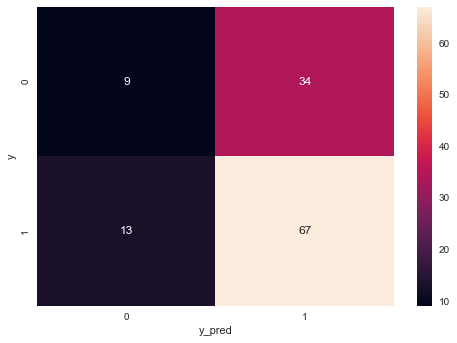

In [53]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_KNC)

# learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

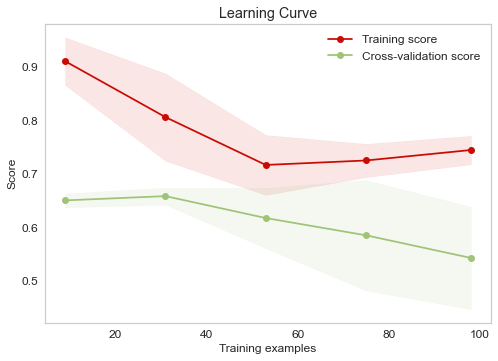

In [54]:
plot_learning_curve(KNC,X_test_ohe , y_test)

# roc-auc

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

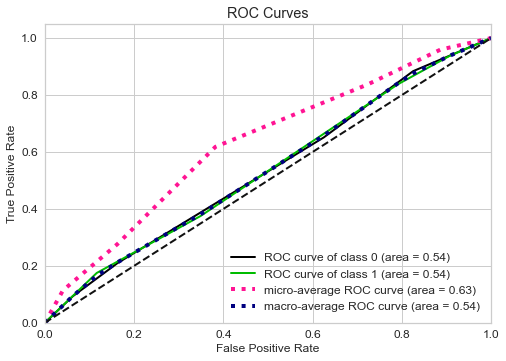

In [55]:
KNC.fit(X_train_ohe, y_train) 
y_probas = KNC.predict_proba(X_test_ohe)
skplt.metrics.plot_roc(y_test, y_probas)

# 4) Iteration- DecisionTree

In [56]:
DeT = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', DecisionTreeClassifier()]])

In [57]:
KNC.fit(X_train_ohe, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', KNeighborsClassifier()]])

In [58]:
print("accuracy train : %.3f"%KNC.score(X_train_ohe, y_train))
print("accuracy test : %.3f"%KNC.score(X_test_ohe , y_test))

accuracy train : 0.705
accuracy test : 0.618


In [59]:
y_pred_KNC = KNC.predict(X_test_ohe) 

In [60]:
print(classification_report(y_test, y_pred_KNC))

              precision    recall  f1-score   support

           0       0.41      0.21      0.28        43
           1       0.66      0.84      0.74        80

    accuracy                           0.62       123
   macro avg       0.54      0.52      0.51       123
weighted avg       0.57      0.62      0.58       123



# matrice confusion

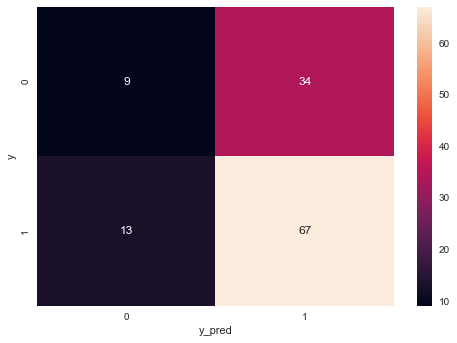

In [61]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_KNC)

# learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

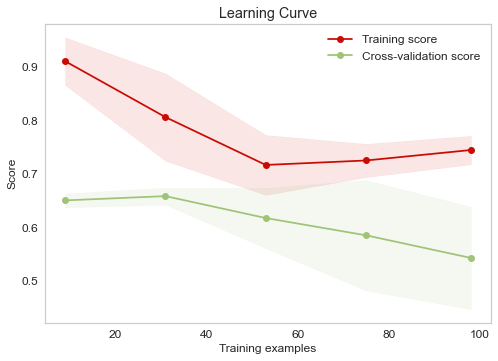

In [62]:
plot_learning_curve(KNC, X_test_ohe , y_test)

# roc-auc

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

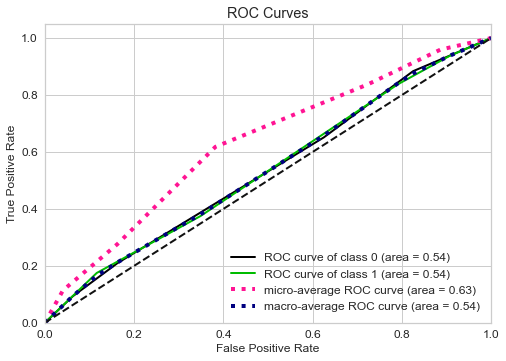

In [63]:
KNC.fit(X_train_ohe, y_train)
y_probas = KNC.predict_proba(X_test_ohe)
skplt.metrics.plot_roc(y_test, y_probas)

# 5) Iteration-Bagging(RandomForestClassifier)

In [64]:
RFC = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', RandomForestClassifier()]])

In [65]:
RFC.fit(X_train_ohe, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', RandomForestClassifier()]])

In [66]:
print("accuracy train : %.3f"%RFC.score(X_train_ohe, y_train))
print("accuracy test : %.3f"%RFC.score(X_test_ohe , y_test))

accuracy train : 0.782
accuracy test : 0.626


In [67]:
y_pred_RFC = RFC.predict(X_test_ohe) 

In [68]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.44      0.26      0.32        43
           1       0.67      0.82      0.74        80

    accuracy                           0.63       123
   macro avg       0.56      0.54      0.53       123
weighted avg       0.59      0.63      0.60       123



# matrice confusion

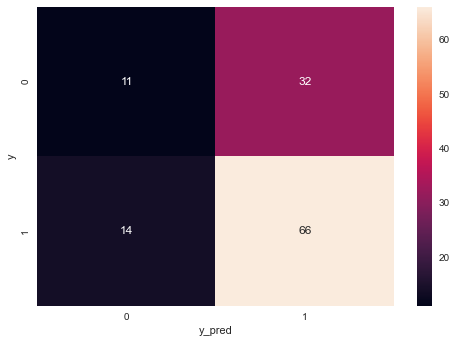

In [69]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_RFC)

# learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

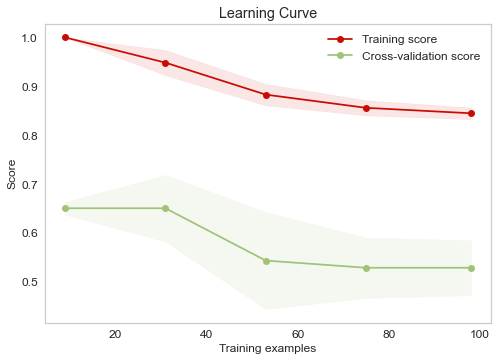

In [70]:
plot_learning_curve(RFC, X_test_ohe , y_test)

# roc-auc

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

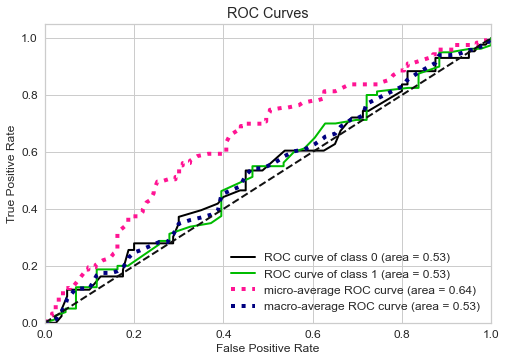

In [71]:
RFC.fit(X_train_ohe, y_train)
y_probas = RFC.predict_proba(X_test_ohe)
skplt.metrics.plot_roc(y_test, y_probas)

# 6) Iteration-Boosting(GradientBoostingClassifier)

In [72]:
GBC = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', GradientBoostingClassifier()]])

In [73]:
GBC.fit(X_train_ohe, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', GradientBoostingClassifier()]])

In [74]:
print("accuracy train : %.3f"%GBC.score(X_train_ohe, y_train))
print("accuracy test : %.3f"%GBC.score(X_test_ohe , y_test))

accuracy train : 0.747
accuracy test : 0.626


In [75]:
y_pred_GBC = GBC.predict(X_test_ohe)

In [76]:
print(classification_report(y_test, y_pred_GBC))

              precision    recall  f1-score   support

           0       0.38      0.12      0.18        43
           1       0.65      0.90      0.76        80

    accuracy                           0.63       123
   macro avg       0.52      0.51      0.47       123
weighted avg       0.56      0.63      0.56       123



# matrice confusion

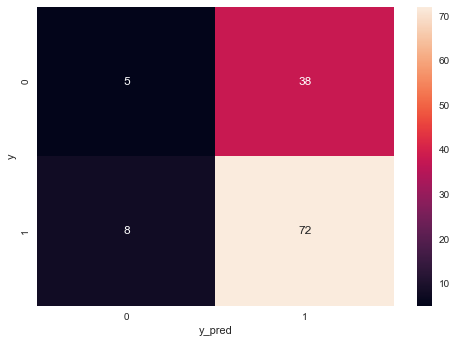

In [77]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_GBC)

# learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

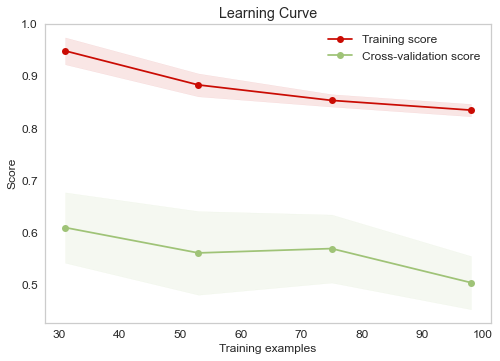

In [78]:
plot_learning_curve(GBC,X_test_ohe , y_test)

# roc-auc

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

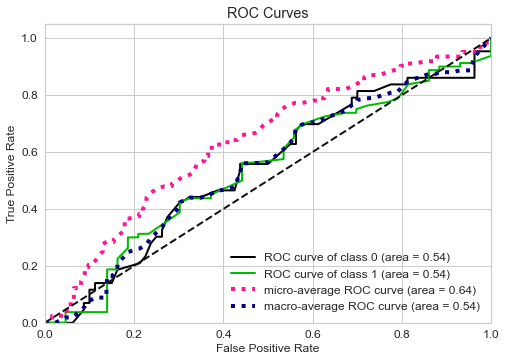

In [79]:
GBC.fit(X_train_ohe, y_train)
y_probas = GBC.predict_proba(X_test_ohe)
skplt.metrics.plot_roc(y_test, y_probas)

In [81]:
# faire une prevision 
# profil_test=[[1,1,1,0,0,0,1,0,1,0,100,0,400,360]]
# RFC.predict(profil_test)

# Enregsiter le modele

In [82]:
pickle.dump(RFC,open('prevision_credit.pkl','wb'))

In [83]:
filename="model1.pkl"


In [84]:
import pickle
with open(filename, 'wb') as f:
    pickle.dump(RFC, f)

In [85]:
with open(filename, 'rb') as f:
    m = pickle.load(f)

In [86]:
data_base = mysql.connector.connect(host="localhost" , user="root" , password="youcef." , database="loan_prediction")
cur = data_base.cursor(buffered=True)
query = "select * from loan_prediction_data"
cur.execute(query)
tables = cur.fetchone()

DatabaseError: 2003 (HY000): Can't connect to MySQL server on 'localhost:3306' (10061)